<a href="https://colab.research.google.com/github/Mark-G321/Basic-PLA-analysis/blob/main/Basic_PLA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

imports and function definitions

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#will be used to plot our data in 2d
def plot(points, labels,name,func1=None, func2=None):
  x1 = points[:, 0]
  x2 = points[:, 1]
  color = ['red' if label == 1 else 'blue' for label in labels]
  plt.scatter(x1, x2, marker='o', color=color) #plots the data points
  plt.xlabel('X1 input feature')
  plt.ylabel('X2 input feature')
  plt.title(name)
  if func1 is not None:
    a,b=func1
    x= np.array([-100*1//a, 100*1//a]) # plot the function line(the plot size is relative to the slope, this helps with normalizing the graph size to a random slope variable)
    y = np.array([a*x[0]+b, a*x[1]+b])
    plt.plot(x, y,color="blue")
  if func2 is not None:
    a,b=func2
    x= np.array([-100*1//a, 100*1//a]) 
    y = np.array([a*x[0]+b, a*x[1]+b])
    plt.plot(x, y,color="red")
  plt.show()

Generating a random function f(x) where f(x)=ax+b.
For simplicty we choose a,b from [-10,10].
We will map the side y>=f(x) as +1 and y<f(x) as -1.
This function will be used to make sure the data we will generate is linearly separable.

In [ ]:
a= np.random.randint(-10,10)
# for ease of classification we assume a=/=0
while(not a):
  a= np.random.randint(-10,10)
b= np.random.randint(-10,10)

Now we will generate N=20 data points and label them according to our defined function f(x), for simplicity again we assume x is in the range of [-100,100]

In [ ]:
X=np.random.randint(-100,100,size=(20,2))
Y=[1 if (x[1]-b)/a>x[0]  else -1 for x in X]

Now we will plot our data points together with another plot using the function we used to generate the data to visualize what we expect from the Perceptron learning algorithm

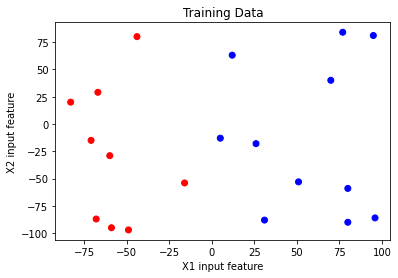

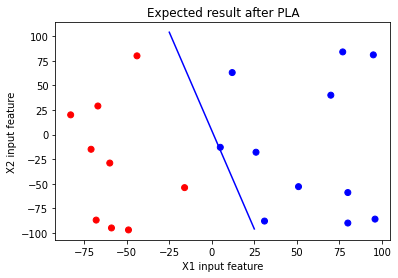

In [ ]:
#generate first plot of points distributed in space
plot(X,Y,"Training Data")
print() #spacing of plots
#generate second plot that shows our theoretical goal after PLA using f
plot(X,Y,"Expected result after PLA",(a,b))

Now we will run the Perceptron Learning Algorithm on the data above to find a seperator line

In [ ]:
w0=w1=bias=0 # set the starting weight to be w=(0,0) with bias = 0
flag=1 #the flag will track if there were any updates to the weights in the previous iteration, and we will stop when there were no updates
iterCount=0 # counts the number of updates the algorithm makes before converging
while(flag==1):
  flag=0
  for i in range(len(X)):
    yt= w0*X[i][0]+w1*X[i][1]+bias #this is equal to W^T*x(t)+bias
    yt=1 if yt>0 else -1
    if Y[i]*yt<0:
      flag=1
      iterCount+=1
      #update the weights and bias
      bias+=Y[i]
      w0=w0+Y[i]*X[i][0]
      w1=w1+Y[i]*X[i][1]

print("Result weights vector is: w = (",w0,",",w1,")"," with bias of ",bias) # prints the result weights and bias

Result weights vector is: w = ( -145 , -11 )  with bias of  0


Lets plot the data again using the function g we found from PLA

Original parameters of function f are:  -4 4
new parameters of function g after PLA are:  -13.181818181818183 9.090909090909092e-05


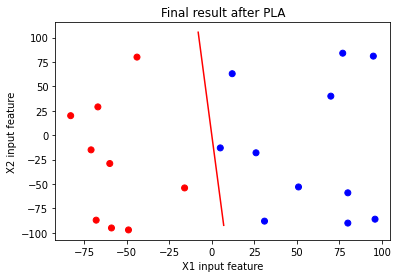

In [ ]:
print("Original parameters of function f are: ",a,b)
#finding the slope and intercept of the function g(x) after PLA
if bias==0: #otherwise division by 0 will occur
  bias=0.001
a2 = -(bias/w1)/(bias/w0)  
b2 = -bias/w1
print("new parameters of function g after PLA are: ",a2,b2)
plot(X,Y,'Final result after PLA',func2=(a2,b2))


Answer for (a) (a): prints the number of updates the PLA algorithm made


In [ ]:
print("the number of updates the PLA made was: ", iterCount) 

the number of updates the PLA made was:  2


Answer for (a) (b) ploting the required data

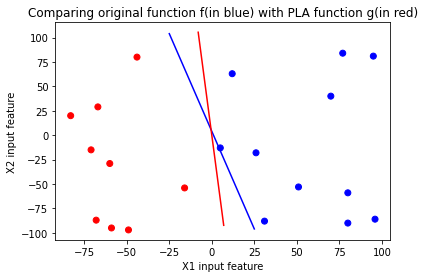

In [ ]:
plot(X,Y,'Comparing original function f(in blue) with PLA function g(in red)',(a,b),(a2,b2))

Answer for (a) (c): On average (depending on the distribution of the data set) both lines should be fairly close to each other which is what we would expect based on the fact that the PLA is guaranteed to converge for linearly separable data set

Answer for (a)(d): 

Precent of disagreement is:  4 %


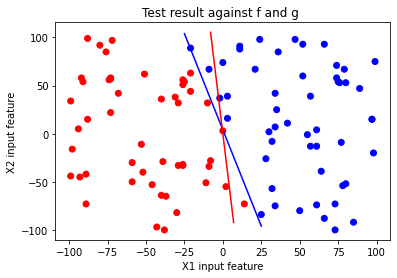

In [ ]:
test=np.random.randint(-100,100,size=(100,2)) #generating the training set
Y1=[1 if (x[1]-b)/a>=x[0]  else -1 for x in test] #labels according to f
Y2=[1 if (x[1]-b2)/a2>=x[0]  else -1 for x in test] # labels according g
missCount=0 #counts misslabels
for i in range(len(Y1)):
  if Y1[i]!=Y2[i]:
    missCount+=1
print("Precent of disagreement is: ",missCount,"%")  

#ploting f and g with the test set:
plot(test,Y1,'Test result against f and g ',(a,b),(a2,b2))

Answer (b): Lets run the entire proccess of (a) again and compare our results:




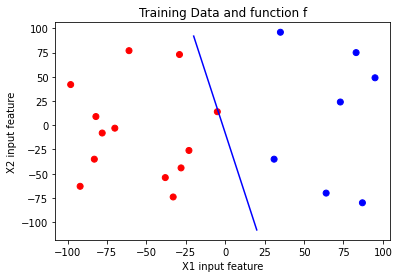


Result weights vector is: w = ( -82 , 9 )  with bias of  1 



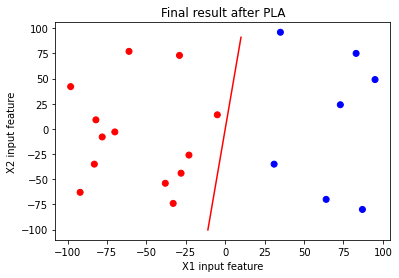

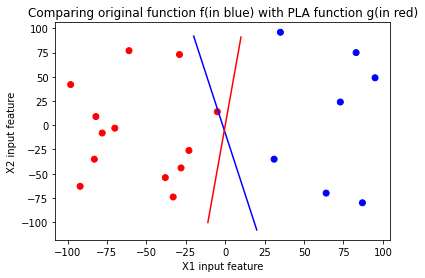


The number of updates we had in part (b) was:  1  and the disagreement between f,g was  13 %


In [ ]:
# first we save our old results to compare
aUpdates=iterCount 
aMiss=missCount

#generate f
a= np.random.randint(-10,10)
while(not a):
  a= np.random.randint(-10,10)
b= np.random.randint(-10,10)

#generate data and label it
X=np.random.randint(-100,100,size=(20,2))
Y=[1 if (x[1]-b)/a>x[0]  else -1 for x in X]

#plot our data together with refrence f
plot(X,Y,"Training Data and function f",(a,b))
print() #spacing of plots
#Run PLA on the data with starting weights 0 and bias 0
w0=w1=bias=0 
flag=1 
iterCount=0 
while(flag==1):
  flag=0
  for i in range(len(X)):
    yt= w0*X[i][0]+w1*X[i][1]+bias #this is equal to W^T*x(t)+bias
    yt=1 if yt>0 else -1
    if Y[i]*yt<0:
      flag=1
      iterCount+=1
      bias+=Y[i]
      w0=w0+Y[i]*X[i][0]
      w1=w1+Y[i]*X[i][1]
print("Result weights vector is: w = (",w0,",",w1,")"," with bias of ",bias,"\n") 
#finding the slope and intercept of the function g(x) after PLA
if bias==0: 
  bias=0.001
a2 = -(bias/w1)/(bias/w0)  
b2 = -bias/w1
#plot data with new function g
plot(X,Y,'Final result after PLA',func2=(a2,b2))
print()
#plot the original function f against found function g
plot(X,Y,'Comparing original function f(in blue) with PLA function g(in red)',(a,b),(a2,b2))
print()
#test for the disagreement between f and g
test=np.random.randint(-100,100,size=(100,2)) #generating the training set
Y1=[1 if (x[1]-b)/a>=x[0]  else -1 for x in test] #labels according to f
Y2=[1 if (x[1]-b2)/a2>=x[0]  else -1 for x in test] # labels according g
missCount=0 #counts misslabels
for i in range(len(Y1)):
  if Y1[i]!=Y2[i]:
    missCount+=1 
print("The number of updates we had in part (b) was: ",iterCount, " and the disagreement between f,g was ", missCount,"%") #spacing of plots


Lets compare this with the number of updates and disagreement from (a), and plot the target function g agaisnt the original function f and see how close they are relative to the testing set

In question (a) the number of updates was:  2  vs  1  in question(b)
the disagreement between f and g in question (a) was:  4 %  vs  13 %  in question (b)



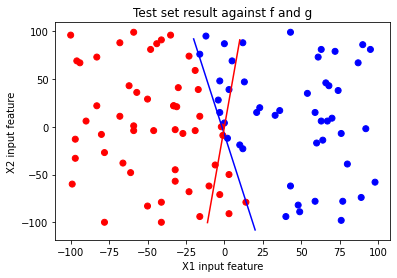

In [ ]:
print("In question (a) the number of updates was: ",aUpdates," vs ",iterCount," in question(b)")
print("the disagreement between f and g in question (a) was: ", aMiss,"%", " vs ", missCount,"%"," in question (b)") 
print()
plot(test,Y1,'Test set result against f and g',(a,b),(a2,b2))


On average we should expect pretty close result as nothing was change between (a) and (b) 

Answer (c): Lets run the proccess again but now with N=100


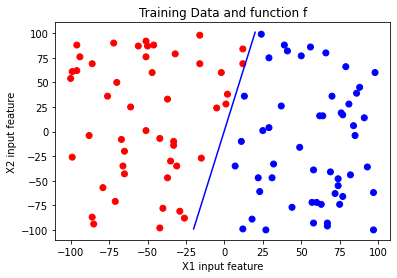


Result weights vector is: w = ( -168 , 34 )  with bias of  0 



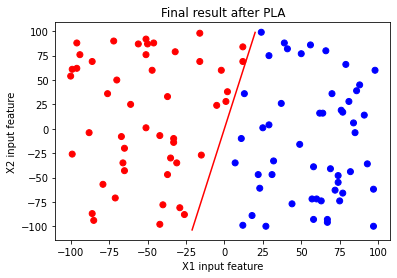

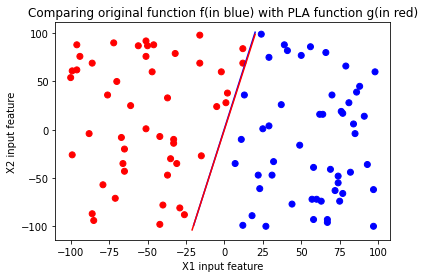


The number of updates we had in part (b) was:  6  and the disagreement between f,g was  0 %


In [ ]:
#generate f
a= np.random.randint(-10,10)
while(not a):
  a= np.random.randint(-10,10)
b= np.random.randint(-10,10)

#generate data and label it
X=np.random.randint(-100,100,size=(100,2))#note N=100
Y=[1 if (x[1]-b)/a>x[0]  else -1 for x in X]
#plot our data together with refrence f
plot(X,Y,"Training Data and function f",(a,b))
print() #spacing of plots
#Run PLA on the data with starting weights 0 and bias 0
w0=w1=bias=0 
flag=1 
iterCount=0 
while(flag==1):
  flag=0
  for i in range(len(X)):
    yt= w0*X[i][0]+w1*X[i][1]+bias #this is equal to W^T*x(t)+bias
    yt=1 if yt>0 else -1
    if Y[i]*yt<0:
      flag=1
      iterCount+=1
      bias+=Y[i]
      w0=w0+Y[i]*X[i][0]
      w1=w1+Y[i]*X[i][1]
print("Result weights vector is: w = (",w0,",",w1,")"," with bias of ",bias,"\n") 
#finding the slope and intercept of the function g(x) after PLA
if bias==0: 
  bias=0.001
a2 = -(bias/w1)/(bias/w0)  
b2 = -bias/w1
#plot data with new function g
plot(X,Y,'Final result after PLA',func2=(a2,b2))
print()
#plot the original function f against found function g
plot(X,Y,'Comparing original function f(in blue) with PLA function g(in red)',(a,b),(a2,b2))
print()
#test for the disagreement between f and g
test=np.random.randint(-100,100,size=(100,2)) #generating the training set
Y1=[1 if (x[1]-b)/a>=x[0]  else -1 for x in test] #labels according to f
Y2=[1 if (x[1]-b2)/a2>=x[0]  else -1 for x in test] # labels according g
missCount=0 #counts misslabels
for i in range(len(Y1)):
  if Y1[i]!=Y2[i]:
    missCount+=1 
print("The number of updates we had in part (b) was: ",iterCount, " and the disagreement between f,g was ", missCount,"%") #spacing of plots


Now lets comapre with (a)

In question (a) the number of updates was:  2  vs  6  in question(b)
the disagreement between f and g in question (a) was:  4 %  vs  0 %  in question (b)



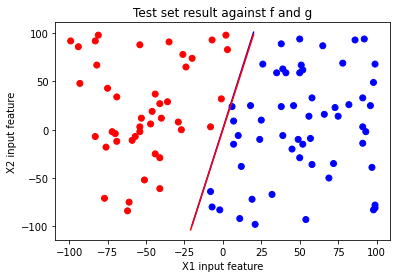

In [ ]:
print("In question (a) the number of updates was: ",aUpdates," vs ",iterCount," in question(b)")
print("the disagreement between f and g in question (a) was: ", aMiss,"%", " vs ", missCount,"%"," in question (b)") 
print()
plot(test,Y1,'Test set result against f and g',(a,b),(a2,b2))


Answer (c): Here we can see the on average the number of updates went up vs in (a) and the disagreement should have gone down as the two function should actually be closer together as the larger data set restricts the function g to be closer to f

Answer(d): lets repeat the process with N=1000:

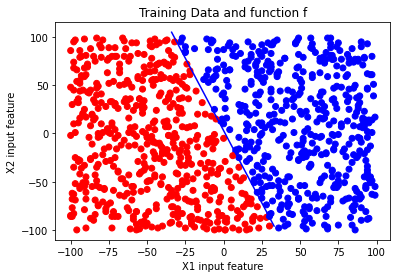


Result weights vector is: w = ( -213 , -71 )  with bias of  7 



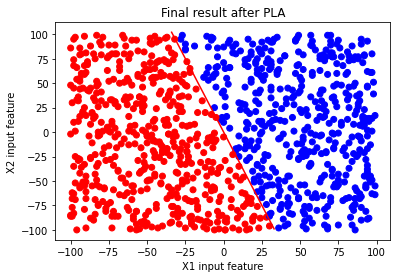

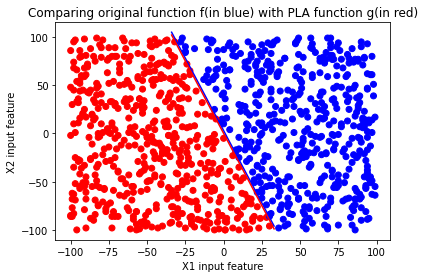


The number of updates we had in part (b) was:  13  and the disagreement between f,g was  1 %


In [ ]:
#generate f
a= np.random.randint(-10,10)
while(not a):
  a= np.random.randint(-10,10)
b= np.random.randint(-10,10)
#generate data and label it

X=np.random.randint(-100,100,size=(1000,2))#N=1000
Y=[1 if (x[1]-b)/a>x[0]  else -1 for x in X]
#plot our data together with refrence f

plot(X,Y,"Training Data and function f",(a,b))
print() #spacing of plots
#Run PLA on the data with starting weights 0 and bias 0
w0=w1=bias=0 
flag=1 
iterCount=0 
while(flag==1):
  flag=0
  for i in range(len(X)):
    yt= w0*X[i][0]+w1*X[i][1]+bias #this is equal to W^T*x(t)+bias
    yt=1 if yt>0 else -1
    if Y[i]*yt<0:
      flag=1
      iterCount+=1
      bias+=Y[i]
      w0=w0+Y[i]*X[i][0]
      w1=w1+Y[i]*X[i][1]
print("Result weights vector is: w = (",w0,",",w1,")"," with bias of ",bias,"\n") 
#finding the slope and intercept of the function g(x) after PLA
if bias==0: 
  bias=0.001
a2 = -(bias/w1)/(bias/w0)  
b2 = -bias/w1
#plot data with new function g
plot(X,Y,'Final result after PLA',func2=(a2,b2))
print()
#plot the original function f against found function g
plot(X,Y,'Comparing original function f(in blue) with PLA function g(in red)',(a,b),(a2,b2))
print()
#test for the disagreement between f and g
test=np.random.randint(-100,100,size=(100,2)) #generating the training set
Y1=[1 if (x[1]-b)/a>=x[0]  else -1 for x in test] #labels according to f
Y2=[1 if (x[1]-b2)/a2>=x[0]  else -1 for x in test] # labels according g
missCount=0 #counts misslabels
for i in range(len(Y1)):
  if Y1[i]!=Y2[i]:
    missCount+=1 
print("The number of updates we had in part (b) was: ",iterCount, " and the disagreement between f,g was ", missCount,"%") #spacing of plots


and now comparting to (a)

In question (a) the number of updates was:  2  vs  13  in question(b)
the disagreement between f and g in question (a) was:  4 %  vs  1 %  in question (b)



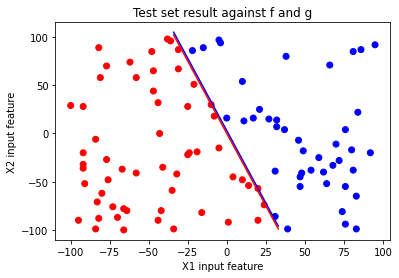

In [ ]:
print("In question (a) the number of updates was: ",aUpdates," vs ",iterCount," in question(b)")
print("the disagreement between f and g in question (a) was: ", aMiss,"%", " vs ", missCount,"%"," in question (b)") 
print()
plot(test,Y1,'Test set result against f and g',(a,b),(a2,b2))


Answer (d): We can see that now we have significantly more iteration before convergence and the precent disagreement should be near 0% as our data set is large enough to promise accuret prediction on the test set

Answer (e): Lets repeat the proccess with d=10 and N=1000 and see the result

finished  0 %
finished  10 %
finished  20 %
finished  30 %
finished  40 %
finished  50 %
finished  60 %
finished  70 %
finished  80 %
finished  90 %


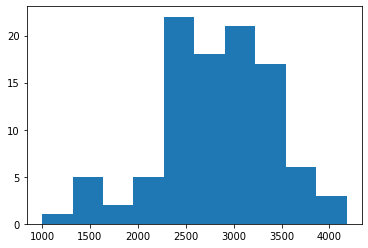

In [ ]:
#first we define a PLA function that accepts a d=10 data set and labels and returns the amount of iteration before convergence
def PLA(X,Y):
  w=np.zeros(10)#inital weights vector where all weights are set to 0
  bias=0
  flag=1 
  iterCount=0 
  indices=np.arange(1000) #this will represet the order by which we go through X
  while(flag==1):
    flag=0
    np.random.shuffle(indices) #we shuffle the order we go through X every iteration which is the same as picing x(t) at random without repicking the same x(t) in the same iteration
    for i in indices:
      yt=np.dot(w,X[i])+bias #this is equal to W^T*x(t)+bias
      yt=1 if yt>0 else -1
      if Y[i]*yt<0:
        flag=1
        iterCount+=1
        bias+=Y[i]
        w=w+Y[i]*X[i] #using numpy array broadcasting      
  return iterCount

#generate f
F=np.random.randint(-10,10,size=(10))
#generate data and label it
X=np.random.randint(-100,100,size=(1000,10))
Y=[1 if np.dot(F,x)>0  else -1 for x in X]
#Run PLA on the data for 100 experiments and collect the number of iteration each experement
experIter=[]
for i in range(100):
  if i%10==0: print("finished ",i,"%")
  experIter.append(PLA(X,Y))

#ploting the histogram
plt.hist(experIter)
plt.show() 



Answer (f): From the initial proccess of increasing the size of our training set we could see that the larger N was the higher the accuracy of g was when tested on the testing data, but of course the trade off was higher training time since we had more data to go through each iteration of the PLA.

Then we saw that increasing the dimension increased the training time significantly, which makes sense since the computational complexity of each iteration went up.